## practical no:- 2
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution. 

### Import all the required Python Libraries.

In [1]:
import pandas as pd
import numpy as np

### Reading the dataset and loading into pandas dataframe

In [2]:
df = pd.read_csv("A2.csv")
df.head()

,maths score,writing score,reading score,placement score,clubjoining,placementoffercount
0,68.0,94.0,77.0,80.0,18.0,2.0
1,62.0,93.0,62.0,93.0,21.0,3.0
2,65.0,80.0,68.0,NaN,18.0,3.0
3,95.0,94.0,75.0,97.0,NaN,3.0
4,60.0,76.0,62.0,95.0,18.0,3.0


In [3]:
df.shape

(29, 6)

In [4]:
df.dtypes

maths score            float64
writing score          float64
reading score          float64
placement score        float64
clubjoining            float64
placementoffercount    float64
dtype: object

## 1) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 

### Handle the Missing value

In [5]:
df.isna().sum()

maths score            3
writing score          3
reading score          1
placement score        3
clubjoining            2
placementoffercount    4
dtype: int64

### Make a list of column having missing value

In [6]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['maths score',
 'writing score',
 'reading score',
 'placement score',
 'clubjoining',
 'placementoffercount']

### Fill the missing value using mean for float and int datatypes and for other forword fill

In [7]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df.head()

,maths score,writing score,reading score,placement score,clubjoining,placementoffercount
0,68.0,94.0,77.0,80.000000,18.000000,2.0
1,62.0,93.0,62.0,93.000000,21.000000,3.0
2,65.0,80.0,68.0,87.269231,18.000000,3.0
3,95.0,94.0,75.0,97.000000,48.037037,3.0
4,60.0,76.0,62.0,95.000000,18.000000,3.0


## 2) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

### Import all the required visualization Python Libraries.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

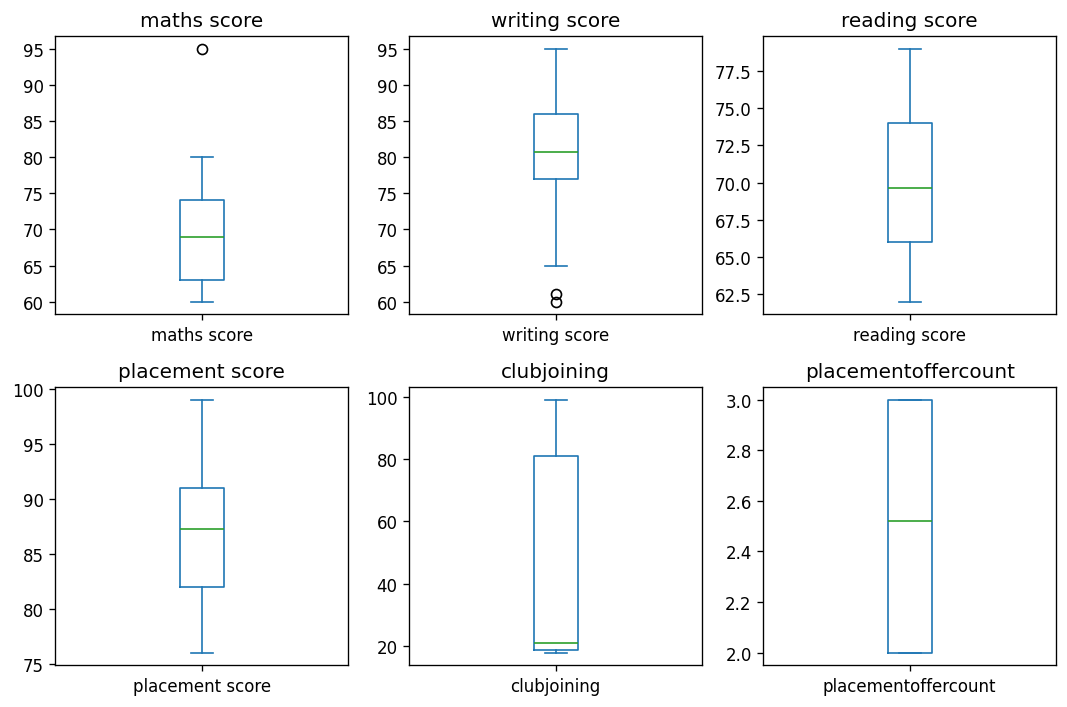

In [9]:
df_list = ['maths score', 'writing score', 'reading score',
           'placement score', 'clubjoining', 'placementoffercount']
fig, axes = plt.subplots(2, 3, figsize=(9, 6), dpi=120)

for i, ax in enumerate(axes.flat):
    if i < len(df_list):
        df[df_list[i]].plot(kind='box', ax=ax)
        ax.set_title(df_list[i])
    else:
        ax.axis('off')

plt.tight_layout() 
plt.show()

In [10]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 77.0, Q3 = 86.0, IQR = 9.0, Lower_limit = 63.5, Upper_limit = 99.5


In [11]:
df[(df['writing score'] < Lower_limit) | (df['writing score'] > Upper_limit)]

,maths score,writing score,reading score,placement score,clubjoining,placementoffercount
5,72.0,60.0,76.0,80.0,18.0,2.0
24,62.0,61.0,76.0,89.0,93.0,3.0


## 3) Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

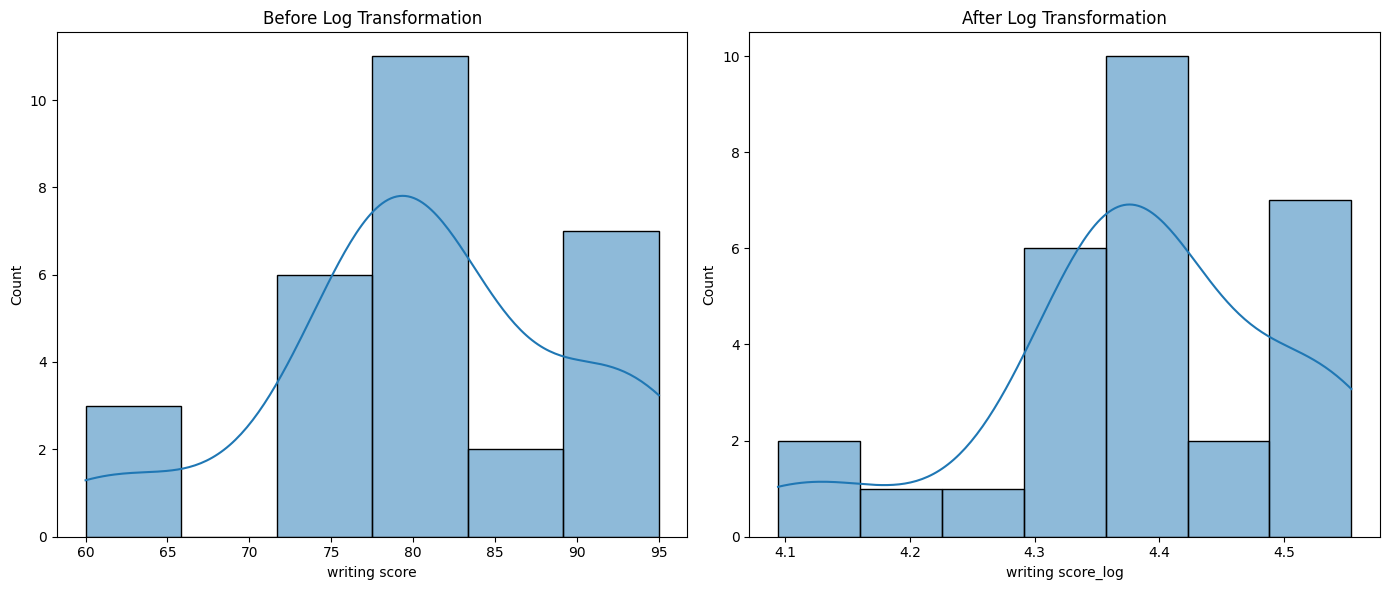

In [12]:
df['writing score_log'] = np.log(df['writing score'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x="writing score", ax=axes[0], kde=True)
sns.histplot(data=df, x="writing score_log", ax=axes[1], kde=True)

axes[0].set_title('Before Log Transformation')
axes[1].set_title('After Log Transformation')

plt.tight_layout()
plt.show()

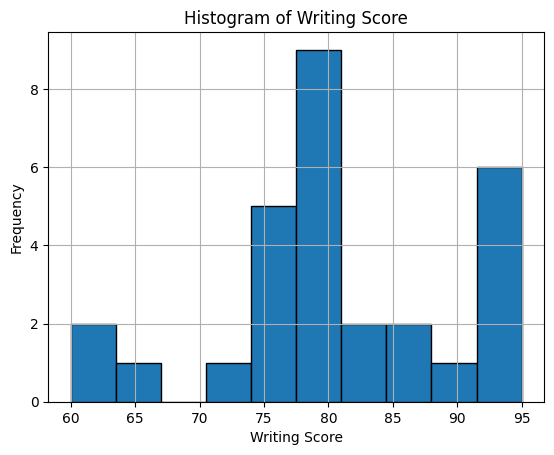

In [13]:
df['writing score'].plot.hist(bins=10, edgecolor='black')  
plt.title('Histogram of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()